### **Mount Google Drive/Parent Directory**

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


### **Install and Import Libraries**

In [ ]:
import os
import cv2
import copy
import pandas as pd
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

from sklearn.metrics import jaccard_score

import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
from torch.functional import Tensor
import torch.optim as optim
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.transforms.functional as TF
from torch.utils.data import Dataset, DataLoader
from torch.nn.modules.activation import ReLU
from torch.nn.modules.batchnorm import BatchNorm2d
import torch.optim as optim

from tqdm import tqdm

In [ ]:
# Matplotlib's PyPlot to show an image stored in a pytorch tensor 
def imshow(inp, title=None):
  """
    Parameters: 
      * inp: the image that we want to show (it needs to have 3 channels, numpy does not show grayscale images)
      * title (optional): the title to show with the image
  """
  inp = inp.numpy().transpose((1, 2, 0)) # Convert from HxWxC format of tensor to CxHxW format of numpy
  # mean = np.array([0.2957, 0.2722, 0.2066])
  # std = np.array([0.2289, 0.2176, 0.1668])
  # inp = std * inp + mean # Denormalize image
  inp = np.clip(inp, 0, 1)
  plt.imshow(inp) # Show the image 
  if title is not None:
      plt.title(title) # Add a title if provided
  plt.pause(0.001)  # pause a bit so that plots are updated

In [ ]:
#### GPU Info
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Wed Oct  5 06:23:53 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   48C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Loss Functions**

### **Evaluation Metrics**

### **Dataset Loading**

In [ ]:
# # To make all the image square so that there is no information loss during squeezing

# class ResizeSquare(object):
    
#     def __init__(self, flag):
#         self.flag = flag
    
#     def __call__(self, img):
#         x, y = img.size 
#         size = max(x, y)
#         if self.flag:
#             new_im = Image.new('1', (size, size), 0)

#         else:
#             new_im = Image.new('RGB', (size, size), (0,0,0))

#         new_im.paste(img, (int((size - x) / 2), int((size - y) / 2))) 
#         return new_im

In [ ]:
# Parameters
SIZE = 512
TRAIN_BATCH_SIZE = 16
VAL_BATCH_SIZE = 16
NUM_WORKERS = 2


# Directories

input_directory = '/content/drive/MyDrive/Colab Notebooks/CAD Project/Dataset/Binary Problem'
train_directory = input_directory+'/train' 
val_directory = input_directory+'/val'

In [ ]:
# Calculating the mean and stdv of the Dataset

# mean = torch.zeros((1,3))
# stdv = torch.zeros((1,3))

# paths = os.listdir(Train_img_folder)

# for idx in range(len(paths)):
#     img_path = paths[idx]
#     img_directory = os.path.join(Train_img_folder, img_path)
#     image = Image.open(img_directory)
#     img = TF.to_tensor(image)
#     mean += torch.mean(img, axis = [1,2])
#     stdv += torch.std(img, axis = [1,2])
           
# mean = mean/len(paths)
# stdv = stdv/len(paths)
# print(f"mean: {mean}")
# print(f"std: {stdv}")


mean: tensor([[0.3166, 0.2922, 0.2228]])
std: tensor([[0.2185, 0.2094, 0.1607]])


In [ ]:
# # mean and standard deviation for data normalization
# mu = [0.3166, 0.2922, 0.2228]
# std = [0.2184, 0.2094, 0.1608]

In [ ]:
# Transforms for preprocessing
img_transforms = transforms.Compose([
                                    #ResizeSquare(flag = False), # For original images
                                    transforms.Resize((SIZE, SIZE)),
                                    transforms.ToTensor(),
                                    #transforms.Normalize(mean=mu, std=std)
                                  ])  

In [ ]:
# training dataset
train_dataset = datasets.ImageFolder(
    root=train_directory,
    transform=img_transforms
)
# validation dataset
valid_dataset = datasets.ImageFolder(
    root=val_directory,
    transform=img_transforms
)
# training data loaders
train_loader = DataLoader(
    train_dataset, batch_size=TRAIN_BATCH_SIZE, shuffle=True,
    num_workers=NUM_WORKERS, pin_memory=True
)
# validation data loaders
valid_loader = DataLoader(
    valid_dataset, batch_size=VAL_BATCH_SIZE, shuffle=False,
    num_workers=NUM_WORKERS, pin_memory=True
)

torch.Size([16, 3, 512, 512])
torch.Size([16])


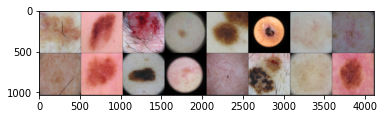

tensor([1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])


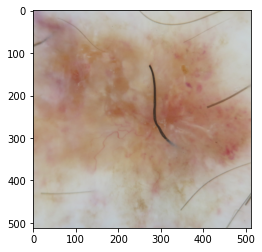

tensor(1)


In [25]:
# Visualize some examples

iterator = iter(train_loader)
data = next(iterator)

(images, labels) = data

print(images.shape)
print(labels.shape)

ins = torchvision.utils.make_grid(images)
imshow(ins)
print(labels)
imshow(images[0])
print(labels[0])